__author__ = 'Ricardo Pasquini'

# Counting tweets at the hexagon level. Complete procedure

Overview: This code counts georeferenced tweets at the hexagon level. Hexagons are uniquely identified in space. We use Uber's H3 library for this purpose.  
The code  also performs a home location prediction for each user. This allows later counting tweets by whether they were tweeted by residents, residents of neighbors hexagons, or non-residents.
The project was designed to be scalable to millions of tweets. The process is done with MongoDB.

By default the project generates the following collections on the Mongo database:

tweets: Collection containing tweets. This collection is modified by incorporating the corresponding hex id. \
users: Collection containing users. This collection is modified by incorporating the home location data.\
hexcounts: Collection containing counts of tweets.


In [1]:
import sys
sys.path.append("../") 
import databasepopulation
import communicationwmongo as commu
import home_location as home
import analysis as a
import pymongo
import pandas as pd
import my_h3_functions as myh3

In [2]:
import importlib
importlib.reload(databasepopulation)
importlib.reload(home)
importlib.reload(a)
importlib.reload(myh3)

<module 'my_h3_functions' from '..\\my_h3_functions.py'>

# Counting tweets at the hexagon level. Complete procedure

This version of the code assumes that a different database will be used for each city.


If necessary check your current location with the following command:

In [3]:
pwd

'C:\\Users\\emman\\Documents\\git\\twitter_and_displacement\\notebooks'

# 0. Connect to Mongo and define a specific database

By default connect to Mongo running on a localhost. 
Requires manually changing the parameters if working on a cloud environment

I will use the name buenosaires as the db example. Recall each database for each city.


In [4]:
db=commu.connecttoLocaldb(database='twitter_hk')

In [5]:
db.twitter_hk

Collection(Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'twitter_hk'), 'twitter_hk')

# 1. Raw data to Mongo
This function populates the files containing tweets into Mongo.
Assumes files are named like: ba_2012.csv, etc.
Choose start and end years.


In [13]:
databasepopulation.populatetweets(db, path='/Users/emman/Box/Twitter data/Asia/Hong Kong/', cityprefix='hk', yearstart=2012, yearend=2012)

Now populating year  2012
process completed


In [8]:
db.tweets.update({},{'$rename':{"latitude":"lat","longitude":"lon"}}, False,True,True)

C:\Users\emman\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: update is deprecated. Use replace_one, update_one or update_many instead.
  """Entry point for launching an IPython kernel.


{'n': 6043344, 'nModified': 6043344, 'ok': 1.0, 'updatedExisting': True}

# 2. Adding Hexids to tweets 
This function includes hexagons ids to each tweet.  

In [14]:
databasepopulation.addhexjob(db)

 iter: 1  time: 0.20639657974243164
 iter: 2  time: 0.1951735019683838
 iter: 3  time: 0.19371867179870605
 iter: 4  time: 0.16485285758972168
 iter: 5  time: 0.1861886978149414
 iter: 6  time: 0.16645097732543945
 iter: 7  time: 0.1707000732421875
 iter: 8  time: 0.16455984115600586
 iter: 9  time: 0.17353534698486328
 iter: 10  time: 0.18550491333007812
 iter: 11  time: 0.17624330520629883
 iter: 12  time: 0.1615900993347168
 iter: 13  time: 0.16568922996520996
 iter: 14  time: 0.16084575653076172
 iter: 15  time: 0.1633741855621338
 iter: 16  time: 0.17107486724853516
 iter: 17  time: 0.18314862251281738
 iter: 18  time: 0.20204591751098633
 iter: 19  time: 0.21155571937561035
 iter: 20  time: 0.1595611572265625
 iter: 21  time: 0.1724989414215088
 iter: 22  time: 0.16976213455200195
 iter: 23  time: 0.17287158966064453
 iter: 24  time: 0.1686081886291504
 iter: 25  time: 0.18528485298156738
 iter: 26  time: 0.15955376625061035
 iter: 27  time: 0.19160795211791992
 iter: 28  time: 0

 iter: 222  time: 0.16560006141662598
 iter: 223  time: 0.1585681438446045
 iter: 224  time: 0.16011786460876465
 iter: 225  time: 0.1905231475830078
 iter: 226  time: 0.17553114891052246
 iter: 227  time: 0.18055963516235352
 iter: 228  time: 0.16052794456481934
 iter: 229  time: 0.15961432456970215
 iter: 230  time: 0.15976333618164062
 iter: 231  time: 0.17429447174072266
 iter: 232  time: 0.16945195198059082
 iter: 233  time: 0.18407797813415527
 iter: 234  time: 0.16570448875427246
 iter: 235  time: 0.16237878799438477
 iter: 236  time: 0.16055727005004883
 iter: 237  time: 0.1625654697418213
 iter: 238  time: 0.18153142929077148
 iter: 239  time: 0.16209793090820312
 iter: 240  time: 0.17833185195922852
 iter: 241  time: 0.18622708320617676
 iter: 242  time: 0.16121268272399902
 iter: 243  time: 0.16100263595581055
 iter: 244  time: 0.1700747013092041
 iter: 245  time: 0.16357183456420898
 iter: 246  time: 0.1626739501953125
 iter: 247  time: 0.1685481071472168
 iter: 248  time: 

 iter: 439  time: 0.2492976188659668
 iter: 440  time: 0.19751334190368652
 iter: 441  time: 0.1904923915863037
 iter: 442  time: 0.19899773597717285
 iter: 443  time: 0.18653440475463867
 iter: 444  time: 0.1901869773864746
 iter: 445  time: 0.1737806797027588
 iter: 446  time: 0.18401789665222168
 iter: 447  time: 0.19547677040100098
 iter: 448  time: 0.2259373664855957
 iter: 449  time: 0.17828845977783203
 iter: 450  time: 0.17096829414367676
 iter: 451  time: 0.18247604370117188
 iter: 452  time: 0.16581130027770996
 iter: 453  time: 0.16302800178527832
 iter: 454  time: 0.1646566390991211
 iter: 455  time: 0.15766525268554688
 iter: 456  time: 0.1950514316558838
 iter: 457  time: 0.19114065170288086
 iter: 458  time: 0.19647765159606934
 iter: 459  time: 0.23831915855407715
 iter: 460  time: 0.19514679908752441
 iter: 461  time: 0.19961071014404297
 iter: 462  time: 0.18251466751098633
 iter: 463  time: 0.16698169708251953
 iter: 464  time: 0.20431852340698242
 iter: 465  time: 0

 iter: 657  time: 0.16799545288085938
 iter: 658  time: 0.17552924156188965
 iter: 659  time: 0.17453360557556152
 iter: 660  time: 0.1874983310699463
 iter: 661  time: 0.17297959327697754
 iter: 662  time: 0.20831751823425293
 iter: 663  time: 0.18788719177246094
 iter: 664  time: 0.17886018753051758
 iter: 665  time: 0.17353558540344238
 iter: 666  time: 0.18911218643188477
 iter: 667  time: 0.16584014892578125
 iter: 668  time: 0.17357492446899414
 iter: 669  time: 0.16551733016967773
 iter: 670  time: 0.1989150047302246
 iter: 671  time: 0.16915059089660645
 iter: 672  time: 0.17449188232421875
 iter: 673  time: 0.18699407577514648
 iter: 674  time: 0.17286229133605957
 iter: 675  time: 0.17045211791992188
 iter: 676  time: 0.17274761199951172
 iter: 677  time: 0.1767275333404541
 iter: 678  time: 0.18364667892456055
 iter: 679  time: 0.19485807418823242
 iter: 680  time: 0.16756701469421387
 iter: 681  time: 0.16757631301879883
 iter: 682  time: 0.1798090934753418
 iter: 683  time

 iter: 875  time: 0.21837425231933594
 iter: 876  time: 0.1964728832244873
 iter: 877  time: 0.2234187126159668
 iter: 878  time: 0.2279205322265625
 iter: 879  time: 0.1989743709564209
 iter: 880  time: 0.18554329872131348
 iter: 881  time: 0.1781306266784668
 iter: 882  time: 0.17682123184204102
 iter: 883  time: 0.18056082725524902
 iter: 884  time: 0.19049859046936035
 iter: 885  time: 0.20045137405395508
 iter: 886  time: 0.18546319007873535
 iter: 887  time: 0.20694303512573242
 iter: 888  time: 0.24634528160095215
 iter: 889  time: 0.22992348670959473
 iter: 890  time: 0.19305849075317383
 iter: 891  time: 0.1874980926513672
 iter: 892  time: 0.17465925216674805
 iter: 893  time: 0.21616911888122559
 iter: 894  time: 0.17549705505371094
 iter: 895  time: 0.19846653938293457
 iter: 896  time: 0.3052060604095459
 iter: 897  time: 0.22939610481262207
 iter: 898  time: 0.21359872817993164
 iter: 899  time: 0.2026195526123047
 iter: 900  time: 0.1845073699951172
 iter: 901  time: 0.3

 iter: 1090  time: 0.18351244926452637
 iter: 1091  time: 0.20108628273010254
 iter: 1092  time: 0.18745851516723633
 iter: 1093  time: 0.18203258514404297
 iter: 1094  time: 0.1765003204345703
 iter: 1095  time: 0.18151402473449707
 iter: 1096  time: 0.18255257606506348
 iter: 1097  time: 0.175490140914917
 iter: 1098  time: 0.17854928970336914
 iter: 1099  time: 0.24882030487060547
 iter: 1100  time: 0.2224578857421875
 iter: 1101  time: 0.22696328163146973
 iter: 1102  time: 0.21033072471618652
 iter: 1103  time: 0.1929476261138916
 iter: 1104  time: 0.21247291564941406
 iter: 1105  time: 0.23034334182739258
 iter: 1106  time: 0.22443461418151855
 iter: 1107  time: 0.2149646282196045
 iter: 1108  time: 0.28626346588134766
 iter: 1109  time: 0.2697412967681885
 iter: 1110  time: 0.2483224868774414
 iter: 1111  time: 0.21143388748168945
 iter: 1112  time: 0.19826197624206543
 iter: 1113  time: 0.2171938419342041
 iter: 1114  time: 0.18657755851745605
 iter: 1115  time: 0.2479901313781

 iter: 1304  time: 0.2343447208404541
 iter: 1305  time: 0.2812483310699463
 iter: 1306  time: 0.28882765769958496
 iter: 1307  time: 0.2723078727722168
 iter: 1308  time: 0.28269195556640625
 iter: 1309  time: 0.34006452560424805
 iter: 1310  time: 0.32213282585144043
 iter: 1311  time: 0.2812478542327881
 iter: 1312  time: 0.2563154697418213
 iter: 1313  time: 0.30311036109924316
 iter: 1314  time: 0.37839317321777344
 iter: 1315  time: 0.32213807106018066
 iter: 1316  time: 0.2872316837310791
 iter: 1317  time: 0.26429319381713867
 iter: 1318  time: 0.24909138679504395
 iter: 1319  time: 0.25614118576049805
 iter: 1320  time: 0.2672843933105469
 iter: 1321  time: 0.26329636573791504
 iter: 1322  time: 0.2967510223388672
 iter: 1323  time: 0.24782538414001465
 iter: 1324  time: 0.2812159061431885
 iter: 1325  time: 0.30142784118652344
 iter: 1326  time: 0.30768489837646484
 iter: 1327  time: 0.27828550338745117
 iter: 1328  time: 0.2951838970184326
 iter: 1329  time: 0.27052354812622

 iter: 1517  time: 0.23041057586669922
 iter: 1518  time: 0.21596169471740723
 iter: 1519  time: 0.21446919441223145
 iter: 1520  time: 0.24031329154968262
 iter: 1521  time: 0.20042014122009277
 iter: 1522  time: 0.20846199989318848
 iter: 1523  time: 0.20792508125305176
 iter: 1524  time: 0.24610233306884766
 iter: 1525  time: 0.23709559440612793
 iter: 1526  time: 0.2436230182647705
 iter: 1527  time: 0.23135066032409668
 iter: 1528  time: 0.26329541206359863
 iter: 1529  time: 0.22539663314819336
 iter: 1530  time: 0.215972900390625
 iter: 1531  time: 0.24561142921447754
 iter: 1532  time: 0.24785351753234863
 iter: 1533  time: 0.22040367126464844
 iter: 1534  time: 0.22711706161499023
 iter: 1535  time: 0.22388863563537598
 iter: 1536  time: 0.2214066982269287
 iter: 1537  time: 0.2692146301269531
 iter: 1538  time: 0.28626179695129395
 iter: 1539  time: 0.25914478302001953
 iter: 1540  time: 0.2189466953277588
 iter: 1541  time: 0.2044529914855957
 iter: 1542  time: 0.20046615600

 iter: 1731  time: 0.1958317756652832
 iter: 1732  time: 0.19095373153686523
 iter: 1733  time: 0.19543743133544922
 iter: 1734  time: 0.19954490661621094
 iter: 1735  time: 0.22378063201904297
 iter: 1736  time: 0.18653535842895508
 iter: 1737  time: 0.19304847717285156
 iter: 1738  time: 0.2144322395324707
 iter: 1739  time: 0.22469639778137207
 iter: 1740  time: 0.22805356979370117
 iter: 1741  time: 0.20345616340637207
 iter: 1742  time: 0.20250344276428223
 iter: 1743  time: 0.22286343574523926
 iter: 1744  time: 0.19451260566711426
 iter: 1745  time: 0.19757747650146484
 iter: 1746  time: 0.20131540298461914
 iter: 1747  time: 0.20588326454162598
 iter: 1748  time: 0.19515633583068848
 iter: 1749  time: 0.1850903034210205
 iter: 1750  time: 0.1864314079284668
 iter: 1751  time: 0.21443533897399902
 iter: 1752  time: 0.1789078712463379
 iter: 1753  time: 0.18855643272399902
 iter: 1754  time: 0.19045591354370117
 iter: 1755  time: 0.19661927223205566
 iter: 1756  time: 0.199465990

 iter: 1943  time: 0.21105742454528809
 iter: 1944  time: 0.2722625732421875
 iter: 1945  time: 0.2748236656188965
 iter: 1946  time: 0.3103492259979248
 iter: 1947  time: 0.24571871757507324
 iter: 1948  time: 0.22394418716430664
 iter: 1949  time: 0.23101544380187988
 iter: 1950  time: 0.20544981956481934
 iter: 1951  time: 0.2074129581451416
 iter: 1952  time: 0.22494721412658691
 iter: 1953  time: 0.2194654941558838
 iter: 1954  time: 0.2284245491027832
 iter: 1955  time: 0.27860116958618164
 iter: 1956  time: 0.23537087440490723
 iter: 1957  time: 0.2293858528137207
 iter: 1958  time: 0.199462890625
 iter: 1959  time: 0.22393417358398438
 iter: 1960  time: 0.2094438076019287
 iter: 1961  time: 0.19071531295776367
 iter: 1962  time: 0.19004487991333008
 iter: 1963  time: 0.1943671703338623
 iter: 1964  time: 0.29485559463500977
 iter: 1965  time: 0.3281221389770508
 iter: 1966  time: 0.2732686996459961
 iter: 1967  time: 0.29843592643737793
 iter: 1968  time: 0.34407901763916016
 i

 iter: 2157  time: 0.19823002815246582
 iter: 2158  time: 0.1984724998474121
 iter: 2159  time: 0.19191336631774902
 iter: 2160  time: 0.18871641159057617
 iter: 2161  time: 0.18151593208312988
 iter: 2162  time: 0.18053364753723145
 iter: 2163  time: 0.19150972366333008
 iter: 2164  time: 0.2089087963104248
 iter: 2165  time: 0.17856717109680176
 iter: 2166  time: 0.1874992847442627
 iter: 2167  time: 0.1830289363861084
 iter: 2168  time: 0.1822495460510254
 iter: 2169  time: 0.19547724723815918
 iter: 2170  time: 0.18041491508483887
 iter: 2171  time: 0.20173382759094238
 iter: 2172  time: 0.2090013027191162
 iter: 2173  time: 0.19236540794372559
 iter: 2174  time: 0.18437790870666504
 iter: 2175  time: 0.1852865219116211
 iter: 2176  time: 0.19452118873596191
 iter: 2177  time: 0.18456578254699707
 iter: 2178  time: 0.18354058265686035
 iter: 2179  time: 0.19219684600830078
 iter: 2180  time: 0.21039438247680664
 iter: 2181  time: 0.1795203685760498
 iter: 2182  time: 0.181691169738

 iter: 2370  time: 0.21030211448669434
 iter: 2371  time: 0.17852187156677246
 iter: 2372  time: 0.17652630805969238
 iter: 2373  time: 0.19652128219604492
 iter: 2374  time: 0.1765303611755371
 iter: 2375  time: 0.18554019927978516
 iter: 2376  time: 0.1685492992401123
 iter: 2377  time: 0.16626286506652832
 iter: 2378  time: 0.20276260375976562
 iter: 2379  time: 0.1845099925994873
 iter: 2380  time: 0.199615478515625
 iter: 2381  time: 0.1722121238708496
 iter: 2382  time: 0.18437576293945312
 iter: 2383  time: 0.1731407642364502
 iter: 2384  time: 0.18457841873168945
 iter: 2385  time: 0.17806792259216309
 iter: 2386  time: 0.23640131950378418
 iter: 2387  time: 0.18048357963562012
 iter: 2388  time: 0.1765282154083252
 iter: 2389  time: 0.17298030853271484
 iter: 2390  time: 0.1794123649597168
 iter: 2391  time: 0.16556024551391602
 iter: 2392  time: 0.16460275650024414
 iter: 2393  time: 0.16222667694091797
 iter: 2394  time: 0.18949460983276367
 iter: 2395  time: 0.1934967041015

 iter: 2582  time: 0.2363276481628418
 iter: 2583  time: 0.24785375595092773
 iter: 2584  time: 0.22140192985534668
 iter: 2585  time: 0.17354035377502441
 iter: 2586  time: 0.17952370643615723
 iter: 2587  time: 0.17748498916625977
 iter: 2588  time: 0.18213915824890137
 iter: 2589  time: 0.19486427307128906
 iter: 2590  time: 0.18419456481933594
 iter: 2591  time: 0.18338584899902344
 iter: 2592  time: 0.17928290367126465
 iter: 2593  time: 0.20844268798828125
 iter: 2594  time: 0.18422460556030273
 iter: 2595  time: 0.17952513694763184
 iter: 2596  time: 0.2263948917388916
 iter: 2597  time: 0.2267916202545166
 iter: 2598  time: 0.19860076904296875
 iter: 2599  time: 0.18299102783203125
 iter: 2600  time: 0.19829273223876953
 iter: 2601  time: 0.20288562774658203
 iter: 2602  time: 0.17709064483642578
 iter: 2603  time: 0.18650484085083008
 iter: 2604  time: 0.1815807819366455
 iter: 2605  time: 0.18169426918029785
 iter: 2606  time: 0.19775605201721191
 iter: 2607  time: 0.18816614

 iter: 2795  time: 0.20154333114624023
 iter: 2796  time: 0.17519831657409668
 iter: 2797  time: 0.1806478500366211
 iter: 2798  time: 0.17557501792907715
 iter: 2799  time: 0.18849444389343262
 iter: 2800  time: 0.1727588176727295
 iter: 2801  time: 0.18650007247924805
 iter: 2802  time: 0.1907811164855957
 iter: 2803  time: 0.20046496391296387
 iter: 2804  time: 0.19599199295043945
 iter: 2805  time: 0.20616579055786133
 iter: 2806  time: 0.19635319709777832
 iter: 2807  time: 0.21363425254821777
 iter: 2808  time: 0.18333983421325684
 iter: 2809  time: 0.18189692497253418
 iter: 2810  time: 0.16800785064697266
 iter: 2811  time: 0.16709566116333008
 iter: 2812  time: 0.16679072380065918
 iter: 2813  time: 0.17275142669677734
 iter: 2814  time: 0.2084062099456787
 iter: 2815  time: 0.23537063598632812
 iter: 2816  time: 0.20246481895446777
 iter: 2817  time: 0.19949674606323242
 iter: 2818  time: 0.1901261806488037
 iter: 2819  time: 0.18255043029785156
 iter: 2820  time: 0.176890611

 iter: 3007  time: 0.20940208435058594
 iter: 3008  time: 0.24136018753051758
 iter: 3009  time: 0.1893932819366455
 iter: 3010  time: 0.23072171211242676
 iter: 3011  time: 0.2962324619293213
 iter: 3012  time: 0.43837428092956543
 iter: 3013  time: 0.354053258895874
 iter: 3014  time: 0.22439980506896973
 iter: 3015  time: 0.22261762619018555
 iter: 3016  time: 0.20109009742736816
 iter: 3017  time: 0.3312511444091797
 iter: 3018  time: 0.30219173431396484
 iter: 3019  time: 0.20245885848999023
 iter: 3020  time: 0.18866801261901855
 iter: 3021  time: 0.20744657516479492
 iter: 3022  time: 0.25037503242492676
 iter: 3023  time: 0.2078862190246582
 iter: 3024  time: 0.1820206642150879
 iter: 3025  time: 0.19447779655456543
 iter: 3026  time: 0.1765284538269043
 iter: 3027  time: 0.19148969650268555
 iter: 3028  time: 0.20345354080200195
 iter: 3029  time: 0.18197870254516602
 iter: 3030  time: 0.21069049835205078
 iter: 3031  time: 0.21203923225402832
 iter: 3032  time: 0.242090702056

 iter: 3219  time: 0.17251873016357422
 iter: 3220  time: 0.1910686492919922
 iter: 3221  time: 0.16925382614135742
 iter: 3222  time: 0.1777184009552002
 iter: 3223  time: 0.2058885097503662
 iter: 3224  time: 0.23813796043395996
 iter: 3225  time: 0.19133400917053223
 iter: 3226  time: 0.19083356857299805
 iter: 3227  time: 0.21845030784606934
 iter: 3228  time: 0.2505924701690674
 iter: 3229  time: 0.21149182319641113
 iter: 3230  time: 0.20998263359069824
 iter: 3231  time: 0.19470787048339844
 iter: 3232  time: 0.20476603507995605
 iter: 3233  time: 0.22248244285583496
 iter: 3234  time: 0.23286652565002441
 iter: 3235  time: 0.2244412899017334
 iter: 3236  time: 0.23637056350708008
 iter: 3237  time: 0.19742727279663086
 iter: 3238  time: 0.1956331729888916
 iter: 3239  time: 0.21349167823791504
 iter: 3240  time: 0.1995530128479004
 iter: 3241  time: 0.19003796577453613
 iter: 3242  time: 0.21837592124938965
 iter: 3243  time: 0.18340277671813965
 iter: 3244  time: 0.19347953796

 iter: 3431  time: 0.20482730865478516
 iter: 3432  time: 0.19507360458374023
 iter: 3433  time: 0.18601083755493164
 iter: 3434  time: 0.2053203582763672
 iter: 3435  time: 0.2123878002166748
 iter: 3436  time: 0.22739267349243164
 iter: 3437  time: 0.2587697505950928
 iter: 3438  time: 0.2792363166809082
 iter: 3439  time: 0.284160852432251
 iter: 3440  time: 0.20422577857971191
 iter: 3441  time: 0.225508451461792
 iter: 3442  time: 0.2314140796661377
 iter: 3443  time: 0.22343707084655762
 iter: 3444  time: 0.21265268325805664
 iter: 3445  time: 0.1967451572418213
 iter: 3446  time: 0.18650126457214355
 iter: 3447  time: 0.20641112327575684
 iter: 3448  time: 0.22191548347473145
 iter: 3449  time: 0.1851189136505127
 iter: 3450  time: 0.261289119720459
 iter: 3451  time: 0.3735377788543701
 iter: 3452  time: 0.24326157569885254
 iter: 3453  time: 0.20301461219787598
 iter: 3454  time: 0.1825118064880371
 iter: 3455  time: 0.1814718246459961
 iter: 3456  time: 0.20498132705688477
 i

 iter: 3644  time: 0.20964813232421875
 iter: 3645  time: 0.17654752731323242
 iter: 3646  time: 0.18955016136169434
 iter: 3647  time: 0.17721128463745117
 iter: 3648  time: 0.1709277629852295
 iter: 3649  time: 0.19461297988891602
 iter: 3650  time: 0.18102669715881348
 iter: 3651  time: 0.22719788551330566
 iter: 3652  time: 0.20203280448913574
 iter: 3653  time: 0.20224881172180176
 iter: 3654  time: 0.2748892307281494
 iter: 3655  time: 0.23241233825683594
 iter: 3656  time: 0.19226908683776855
 iter: 3657  time: 0.20974421501159668
 iter: 3658  time: 0.22739243507385254
 iter: 3659  time: 0.20755767822265625
 iter: 3660  time: 0.22438931465148926
 iter: 3661  time: 0.2423539161682129
 iter: 3662  time: 0.20702385902404785
 iter: 3663  time: 0.21147871017456055
 iter: 3664  time: 0.20046353340148926
 iter: 3665  time: 0.2075057029724121
 iter: 3666  time: 0.17819857597351074
 iter: 3667  time: 0.19491934776306152
 iter: 3668  time: 0.20046758651733398
 iter: 3669  time: 0.17924141

 iter: 3857  time: 0.18311786651611328
 iter: 3858  time: 0.17024016380310059
 iter: 3859  time: 0.17154216766357422
 iter: 3860  time: 0.1881115436553955
 iter: 3861  time: 0.2467515468597412
 iter: 3862  time: 0.17915129661560059
 iter: 3863  time: 0.19859027862548828
 iter: 3864  time: 0.18155717849731445
 iter: 3865  time: 0.1785125732421875
 iter: 3866  time: 0.17735004425048828
 iter: 3867  time: 0.18501543998718262
 iter: 3868  time: 0.1821756362915039
 iter: 3869  time: 0.18650174140930176
 iter: 3870  time: 0.1934826374053955
 iter: 3871  time: 0.22392654418945312
 iter: 3872  time: 0.20267057418823242
 iter: 3873  time: 0.17942070960998535
 iter: 3874  time: 0.17672109603881836
 iter: 3875  time: 0.18052077293395996
 iter: 3876  time: 0.17707610130310059
 iter: 3877  time: 0.17609095573425293
 iter: 3878  time: 0.19333958625793457
 iter: 3879  time: 0.17013812065124512
 iter: 3880  time: 0.20545029640197754
 iter: 3881  time: 0.18450641632080078
 iter: 3882  time: 0.196476221

 iter: 4069  time: 0.24466443061828613
 iter: 4070  time: 0.19647598266601562
 iter: 4071  time: 0.1774904727935791
 iter: 4072  time: 0.17453360557556152
 iter: 4073  time: 0.18117213249206543
 iter: 4074  time: 0.1800365447998047
 iter: 4075  time: 0.17009735107421875
 iter: 4076  time: 0.16411495208740234
 iter: 4077  time: 0.18849587440490723
 iter: 4078  time: 0.16655659675598145
 iter: 4079  time: 0.1692492961883545
 iter: 4080  time: 0.16444730758666992
 iter: 4081  time: 0.2001645565032959
 iter: 4082  time: 0.18013811111450195
 iter: 4083  time: 0.21640419960021973
 iter: 4084  time: 0.1994948387145996
 iter: 4085  time: 0.17981743812561035
 iter: 4086  time: 0.20092105865478516
 iter: 4087  time: 0.17017197608947754
 iter: 4088  time: 0.18010449409484863
 iter: 4089  time: 0.19080519676208496
 iter: 4090  time: 0.17732930183410645
 iter: 4091  time: 0.18377208709716797
 iter: 4092  time: 0.19076108932495117
 iter: 4093  time: 0.21421217918395996
 iter: 4094  time: 0.267321109

In [15]:
# the following is a check and a fix because I think the previous process did not run completely, probably a bug.
# are there any other documents that were not processed?
len(list(db.tweets.find({ "hex" : { "$exists" : False } })))

654

In [16]:
#Process any missing document
cursor=db.tweets.find({ "hex" : { "$exists" : False } })
df = pd.DataFrame(list(cursor))
requests = databasepopulation.add_hexs_and_prepare_bulk_request(df, dataformat='raw')
try:
    db.tweets.bulk_write(requests, ordered=False)
except BulkWriteError as bwe:
    print(bwe.details)

# 3. Database performance task: Add indexes to tweets

In [17]:
databasepopulation.create_indexes(db)

# 4. Populate Users Collection

In [18]:
databasepopulation.populate_users_collection(db)

# 5. Find Home Job for each user id in the database

In [8]:
print('Users with home location identified', db.users.count_documents({'hex9': { '$exists': True} }))


Users with home location identified 13528


# 6 Generate a Hex-level collection including all hexs in the database

By default the collection include as ids only the ids of hexagons at resolution 9
Note that many types of hexogons could coexist in a same collection because hex identifiers are unique. This is not implemented in the current version of the code, though.

In [6]:
home.job_findhomeandpopulate_hex9(db)

Pending users to process... 230200
iter: 50
iter: 100
iter: 150
iter: 200
iter: 250
iter: 300
iter: 350
iter: 400
iter: 450
iter: 500
iter: 550
iter: 600
iter: 650
iter: 700
iter: 750
iter: 800
iter: 850
iter: 900
iter: 950
iter: 1000
iter: 1050
iter: 1100
iter: 1150
iter: 1200
iter: 1250
iter: 1300
iter: 1350
iter: 1400
iter: 1450
iter: 1500
iter: 1550
iter: 1600
iter: 1650
iter: 1700
iter: 1750
iter: 1800
iter: 1850
iter: 1900
iter: 1950
iter: 2000
iter: 2050
iter: 2100
iter: 2150
iter: 2200
iter: 2250
iter: 2300
iter: 2350
iter: 2400
iter: 2450
iter: 2500
iter: 2550
iter: 2600
iter: 2650
iter: 2700
iter: 2750
iter: 2800
iter: 2850
iter: 2900
iter: 2950
iter: 3000
iter: 3050
iter: 3100
iter: 3150
iter: 3200
iter: 3250
iter: 3300
iter: 3350
iter: 3400
iter: 3450
iter: 3500
iter: 3550
iter: 3600
iter: 3650
iter: 3700
iter: 3750
iter: 3800
iter: 3850
iter: 3900
iter: 3950
iter: 4000
iter: 4050
iter: 4100
iter: 4150
iter: 4200
iter: 4250
iter: 4300
iter: 4350
iter: 4400
iter: 4450
iter: 

iter: 35000
iter: 35050
iter: 35100
iter: 35150
iter: 35200
iter: 35250
iter: 35300
iter: 35350
iter: 35400
iter: 35450
iter: 35500
iter: 35550
iter: 35600
iter: 35650
iter: 35700
iter: 35750
iter: 35800
iter: 35850
iter: 35900
iter: 35950
iter: 36000
iter: 36050
iter: 36100
iter: 36150
iter: 36200
iter: 36250
iter: 36300
iter: 36350
iter: 36400
iter: 36450
iter: 36500
iter: 36550
iter: 36600
iter: 36650
iter: 36700
iter: 36750
iter: 36800
iter: 36850
iter: 36900
iter: 36950
iter: 37000
iter: 37050
iter: 37100
iter: 37150
iter: 37200
iter: 37250
iter: 37300
iter: 37350
iter: 37400
iter: 37450
iter: 37500
iter: 37550
iter: 37600
iter: 37650
iter: 37700
iter: 37750
iter: 37800
iter: 37850
iter: 37900
iter: 37950
iter: 38000
iter: 38050
iter: 38100
iter: 38150
iter: 38200
iter: 38250
iter: 38300
iter: 38350
iter: 38400
iter: 38450
iter: 38500
iter: 38550
iter: 38600
iter: 38650
iter: 38700
iter: 38750
iter: 38800
iter: 38850
iter: 38900
iter: 38950
iter: 39000
iter: 39050
iter: 39100
iter

iter: 69150
iter: 69200
iter: 69250
iter: 69300
iter: 69350
iter: 69400
iter: 69450
iter: 69500
iter: 69550
iter: 69600
iter: 69650
iter: 69700
iter: 69750
iter: 69800
iter: 69850
iter: 69900
iter: 69950
iter: 70000
iter: 70050
iter: 70100
iter: 70150
iter: 70200
iter: 70250
iter: 70300
iter: 70350
iter: 70400
iter: 70450
iter: 70500
iter: 70550
iter: 70600
iter: 70650
iter: 70700
iter: 70750
iter: 70800
iter: 70850
iter: 70900
iter: 70950
iter: 71000
iter: 71050
iter: 71100
iter: 71150
iter: 71200
iter: 71250
iter: 71300
iter: 71350
iter: 71400
iter: 71450
iter: 71500
iter: 71550
iter: 71600
iter: 71650
iter: 71700
iter: 71750
iter: 71800
iter: 71850
iter: 71900
iter: 71950
iter: 72000
iter: 72050
iter: 72100
iter: 72150
iter: 72200
iter: 72250
iter: 72300
iter: 72350
iter: 72400
iter: 72450
iter: 72500
iter: 72550
iter: 72600
iter: 72650
iter: 72700
iter: 72750
iter: 72800
iter: 72850
iter: 72900
iter: 72950
iter: 73000
iter: 73050
iter: 73100
iter: 73150
iter: 73200
iter: 73250
iter

iter: 103050
iter: 103100
iter: 103150
iter: 103200
iter: 103250
iter: 103300
iter: 103350
iter: 103400
iter: 103450
iter: 103500
iter: 103550
iter: 103600
iter: 103650
iter: 103700
iter: 103750
iter: 103800
iter: 103850
iter: 103900
iter: 103950
iter: 104000
iter: 104050
iter: 104100
iter: 104150
iter: 104200
iter: 104250
iter: 104300
iter: 104350
iter: 104400
iter: 104450
iter: 104500
iter: 104550
iter: 104600
iter: 104650
iter: 104700
iter: 104750
iter: 104800
iter: 104850
iter: 104900
iter: 104950
iter: 105000
iter: 105050
iter: 105100
iter: 105150
iter: 105200
iter: 105250
iter: 105300
iter: 105350
iter: 105400
iter: 105450
iter: 105500
iter: 105550
iter: 105600
iter: 105650
iter: 105700
iter: 105750
iter: 105800
iter: 105850
iter: 105900
iter: 105950
iter: 106000
iter: 106050
iter: 106100
iter: 106150
iter: 106200
iter: 106250
iter: 106300
iter: 106350
iter: 106400
iter: 106450
iter: 106500
iter: 106550
iter: 106600
iter: 106650
iter: 106700
iter: 106750
iter: 106800
iter: 106850

iter: 134600
iter: 134650
iter: 134700
iter: 134750
iter: 134800
iter: 134850
iter: 134900
iter: 134950
iter: 135000
iter: 135050
iter: 135100
iter: 135150
iter: 135200
iter: 135250
iter: 135300
iter: 135350
iter: 135400
iter: 135450
iter: 135500
iter: 135550
iter: 135600
iter: 135650
iter: 135700
iter: 135750
iter: 135800
iter: 135850
iter: 135900
iter: 135950
iter: 136000
iter: 136050
iter: 136100
iter: 136150
iter: 136200
iter: 136250
iter: 136300
iter: 136350
iter: 136400
iter: 136450
iter: 136500
iter: 136550
iter: 136600
iter: 136650
iter: 136700
iter: 136750
iter: 136800
iter: 136850
iter: 136900
iter: 136950
iter: 137000
iter: 137050
iter: 137100
iter: 137150
iter: 137200
iter: 137250
iter: 137300
iter: 137350
iter: 137400
iter: 137450
iter: 137500
iter: 137550
iter: 137600
iter: 137650
iter: 137700
iter: 137750
iter: 137800
iter: 137850
iter: 137900
iter: 137950
iter: 138000
iter: 138050
iter: 138100
iter: 138150
iter: 138200
iter: 138250
iter: 138300
iter: 138350
iter: 138400

iter: 166150
iter: 166200
iter: 166250
iter: 166300
iter: 166350
iter: 166400
iter: 166450
iter: 166500
iter: 166550
iter: 166600
iter: 166650
iter: 166700
iter: 166750
iter: 166800
iter: 166850
iter: 166900
iter: 166950
iter: 167000
iter: 167050
iter: 167100
iter: 167150
iter: 167200
iter: 167250
iter: 167300
iter: 167350
iter: 167400
iter: 167450
iter: 167500
iter: 167550
iter: 167600
iter: 167650
iter: 167700
iter: 167750
iter: 167800
iter: 167850
iter: 167900
iter: 167950
iter: 168000
iter: 168050
iter: 168100
iter: 168150
iter: 168200
iter: 168250
iter: 168300
iter: 168350
iter: 168400
iter: 168450
iter: 168500
iter: 168550
iter: 168600
iter: 168650
iter: 168700
iter: 168750
iter: 168800
iter: 168850
iter: 168900
iter: 168950
iter: 169000
iter: 169050
iter: 169100
iter: 169150
iter: 169200
iter: 169250
iter: 169300
iter: 169350
iter: 169400
iter: 169450
iter: 169500
iter: 169550
iter: 169600
iter: 169650
iter: 169700
iter: 169750
iter: 169800
iter: 169850
iter: 169900
iter: 169950

iter: 197700
iter: 197750
iter: 197800
iter: 197850
iter: 197900
iter: 197950
iter: 198000
iter: 198050
iter: 198100
iter: 198150
iter: 198200
iter: 198250
iter: 198300
iter: 198350
iter: 198400
iter: 198450
iter: 198500
iter: 198550
iter: 198600
iter: 198650
iter: 198700
iter: 198750
iter: 198800
iter: 198850
iter: 198900
iter: 198950
iter: 199000
iter: 199050
iter: 199100
iter: 199150
iter: 199200
iter: 199250
iter: 199300
iter: 199350
iter: 199400
iter: 199450
iter: 199500
iter: 199550
iter: 199600
iter: 199650
iter: 199700
iter: 199750
iter: 199800
iter: 199850
iter: 199900
iter: 199950
iter: 200000
iter: 200050
iter: 200100
iter: 200150
iter: 200200
iter: 200250
iter: 200300
iter: 200350
iter: 200400
iter: 200450
iter: 200500
iter: 200550
iter: 200600
iter: 200650
iter: 200700
iter: 200750
iter: 200800
iter: 200850
iter: 200900
iter: 200950
iter: 201000
iter: 201050
iter: 201100
iter: 201150
iter: 201200
iter: 201250
iter: 201300
iter: 201350
iter: 201400
iter: 201450
iter: 201500

iter: 229250
iter: 229300
iter: 229350
iter: 229400
iter: 229450
iter: 229500
iter: 229550
iter: 229600
iter: 229650
iter: 229700
iter: 229750
iter: 229800
iter: 229850
iter: 229900
iter: 229950
iter: 230000
iter: 230050
iter: 230100
iter: 230150
iter: 230200


In [17]:
databasepopulation.populate_hexcounts_collection(db)

# 7 Count tweets in each hex by residents and non-residents

In [18]:
import analysis as a

In [19]:
a.countandpopulatejob(db)

Hexagons pending to analyze.. 14086
iter: 50


..\analysis.py:632: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['timestamp'] = pd.to_datetime(df3['created_at'] // 1000, unit='s')
..\analysis.py:634: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['date'] = df3['timestamp'].dt.date
..\analysis.py:635: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexin

iter: 100
iter: 150
iter: 200
iter: 250
iter: 300
iter: 350
iter: 400
iter: 450
iter: 500
iter: 550
iter: 600
iter: 650
iter: 700
iter: 750
iter: 800
iter: 850
iter: 900
iter: 950
iter: 1000
iter: 1050
iter: 1100
iter: 1150
iter: 1200
iter: 1250
iter: 1300
iter: 1350
iter: 1400
iter: 1450
iter: 1500
iter: 1550
iter: 1600
iter: 1650
iter: 1700
iter: 1750
iter: 1800
iter: 1850
iter: 1900
iter: 1950
iter: 2000
iter: 2050
iter: 2100
iter: 2150
iter: 2200
iter: 2250
iter: 2300
iter: 2350
iter: 2400
iter: 2450
iter: 2500
iter: 2550
iter: 2600
iter: 2650
iter: 2700
iter: 2750
iter: 2800
iter: 2850
iter: 2900
iter: 2950
iter: 3000
iter: 3050
iter: 3100
iter: 3150
iter: 3200
iter: 3250
iter: 3300
iter: 3350
iter: 3400
iter: 3450
iter: 3500
iter: 3550
iter: 3600
iter: 3650
iter: 3700
iter: 3750
iter: 3800
iter: 3850
iter: 3900
iter: 3950
iter: 4000
iter: 4050
iter: 4100
iter: 4150
iter: 4200
iter: 4250
iter: 4300
iter: 4350
iter: 4400
iter: 4450
iter: 4500
iter: 4550
iter: 4600
iter: 4650
iter: 

# 8 Query to the DB to create the counts dataframe 

In [20]:
df=a.hexcountsresults_to_df(db, save=False)
# if save=True then saves resulting dataframe a pickle in ./hexcountsdf.pkl

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 121763 entries, 0 to 121762
Data columns (total 7 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   _id                          121763 non-null  object        
 1   level_1                      121763 non-null  object        
 2   nonresidents                 121200 non-null  float64       
 3   nonresidentsandnonneighbors  120532 non-null  float64       
 4   residents                    17203 non-null   float64       
 5   totalcounts                  121763 non-null  float64       
 6   time                         121763 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 7.4+ MB


In [11]:
df.head()

,_id,level_1,nonresidents,nonresidentsandnonneighbors,residents,totalcounts,time
0,8941022db2fffff,1404086400000,1.0,1.0,NaN,1.0,2014-06-30
1,89410329417ffff,1372550400000,2.0,2.0,NaN,2.0,2013-06-30
2,8941032d043ffff,1372550400000,1.0,1.0,NaN,1.0,2013-06-30
3,8941032d04bffff,1372550400000,1.0,1.0,NaN,1.0,2013-06-30
4,8941032d207ffff,1419984000000,1.0,1.0,NaN,1.0,2014-12-31


In [12]:
#df.to_csv('C:/Users/Emman/Desktop/HongKong_Hexes_RP.csv')

# Funcions for Spatial Analysis
### A. Transform the dataframe with hexids into a geodataframe with hexagons as geometries

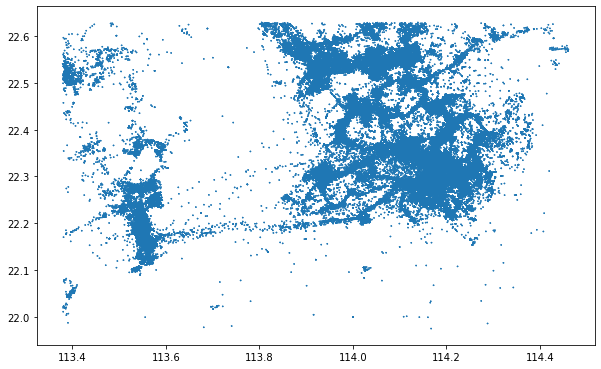

In [13]:
hexgdf = myh3.df_with_hexid_to_gdf(df, hexcolname='_id')
hexgdf.plot()

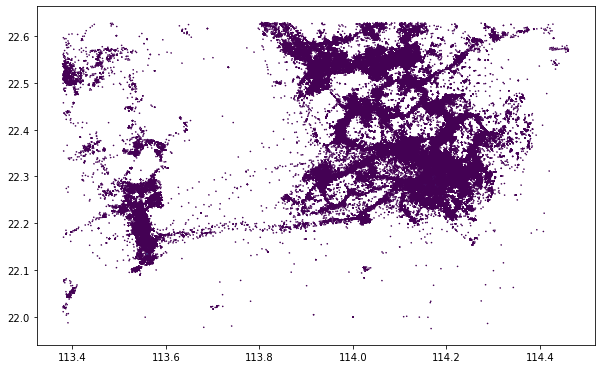

In [14]:
hexgdf.plot('nonresidentsandnonneighbors')

In [15]:
hexgdf.head()

,_id,level_1,nonresidents,nonresidentsandnonneighbors,residents,totalcounts,time,geometry
0,8941022db2fffff,1404086400000,1.0,1.0,NaN,1.0,2014-06-30,"POLYGON ((114.40906 22.18170, 114.40868 22.183..."
1,89410329417ffff,1372550400000,2.0,2.0,NaN,2.0,2013-06-30,"POLYGON ((113.55756 21.99842, 113.55717 22.000..."
2,8941032d043ffff,1372550400000,1.0,1.0,NaN,1.0,2013-06-30,"POLYGON ((113.38887 22.00273, 113.38848 22.004..."
3,8941032d04bffff,1372550400000,1.0,1.0,NaN,1.0,2013-06-30,"POLYGON ((113.38991 22.00567, 113.38952 22.007..."
4,8941032d207ffff,1419984000000,1.0,1.0,NaN,1.0,2014-12-31,"POLYGON ((113.38756 22.01652, 113.38717 22.018..."


## B. Transform the dataframe with hexids into a geodataframe with centoids points as geometries

#### Points can be used for spatial joins.

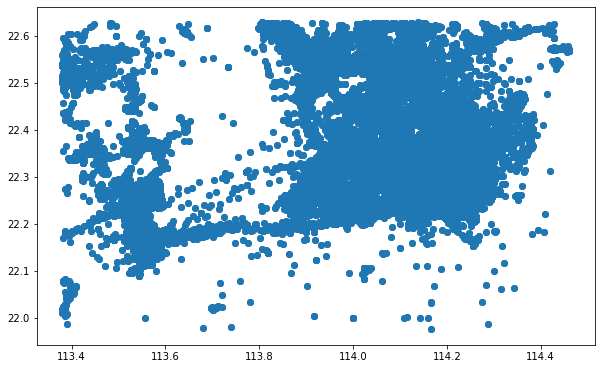

In [16]:
centroidsgdf=myh3.df_with_hexid_to_centroids_gdf(hexgdf, hexcolname='_id')
centroidsgdf.plot()

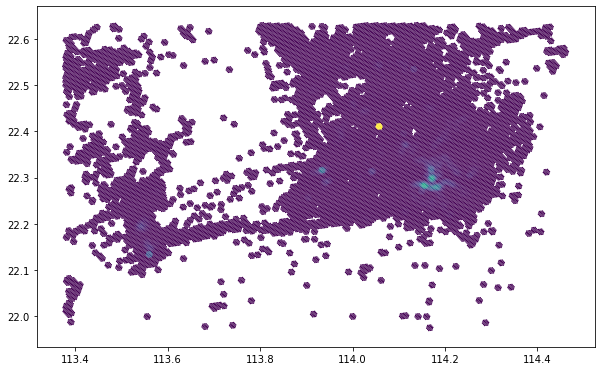

In [14]:
smooth_hexgdf=myh3.kring_smoother(hexgdf, hexcolname='_id',  metric_col='nonresidents')
smooth_hexgdf.plot(column='nonresidents')